In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

# Dependencies
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import datetime as dt

In [2]:
#Used the school summary clean data from school_data_summary notebook
school= pd.read_csv('C:\\Pri doc\\priti\\Projects\\Myproject\\Berkely\\Week 3 Python\\school_data.csv')

In [3]:
school.head()

,School Name,County Name,District Name,Zip Code,Grade,Test Name,2015-2017 Avg Percentage Standard Met and Above,School Type
0,21St Century Learning Institute,Riverside,Beaumont Unified,90804,8,English Language Arts/Literacy,45.00,Middle School
1,21St Century Learning Institute,Riverside,Beaumont Unified,90804,8,Mathematics,18.00,Middle School
2,21St Century Learning Institute,Riverside,Beaumont Unified,90804,11,English Language Arts/Literacy,34.29,High School
3,21St Century Learning Institute,Riverside,Beaumont Unified,90804,11,Mathematics,4.38,High School
4,21St Century Learning Institute,Riverside,Beaumont Unified,90804,13,English Language Arts/Literacy,33.44,High School


In [4]:
school.rename(columns={'School Name': 'School_Name',"County Name": "County"}, inplace=True)

In [5]:
school_agg = school.groupby(['County','District Name','School Type']).agg({'2015-2017 Avg Percentage Standard Met and Above':['mean']})


In [6]:
school_county = school.groupby(['County','School Type']).agg({'2015-2017 Avg Percentage Standard Met and Above':['mean']})


In [7]:
school_county .columns = school_county .columns.droplevel(1)
school_county .columns

school_county=school_county.reset_index()

In [8]:
school_county.rename(columns={'2015-2017 Avg Percentage Standard Met and Above': 'Avg_Percentage_Standard_Met'}, inplace=True)

In [9]:
school_county['Avg_Percentage_Standard_Met']= round(school_county['Avg_Percentage_Standard_Met'],0)

In [10]:
d = {"Elementary School":1, "Middle School":2,"High School":3}
school_county['type_id'] = school_county['School Type'].map(d)

In [11]:
school_county['type_id']=school_county['type_id'].fillna(0).astype(int)
school_county['Avg_Percentage_Standard_Met']=school_county['Avg_Percentage_Standard_Met'].fillna(0).astype(int)

In [12]:
school_county['County']=school_county['County'].fillna(0).astype(str)

In [25]:
school_county['County'].unique()

array(['Alameda', 'Alpine', 'Amador', 'Butte', 'Calaveras', 'Colusa',
       'Contra Costa', 'Del Norte', 'El Dorado', 'Fresno', 'Glenn',
       'Humboldt', 'Imperial', 'Inyo', 'Kern', 'Kings', 'Lake', 'Lassen',
       'Los Angeles', 'Madera', 'Marin', 'Mariposa', 'Mendocino', 'Merced',
       'Modoc', 'Mono', 'Monterey', 'Napa', 'Nevada', 'Orange', 'Placer',
       'Plumas', 'Riverside', 'Sacramento', 'San Benito', 'San Bernardino',
       'San Diego', 'San Francisco', 'San Joaquin', 'San Luis Obispo',
       'San Mateo', 'Santa Barbara', 'Santa Clara', 'Santa Cruz', 'Shasta',
       'Sierra', 'Siskiyou', 'Solano', 'Sonoma', 'Stanislaus', 'Sutter',
       'Tehama', 'Trinity', 'Tulare', 'Tuolumne', 'Ventura', 'Yolo', 'Yuba'], dtype=object)

In [52]:
school_county.head()

,County,School Type,Avg_Percentage_Standard_Met,type_id
0,Alameda,Elementary School,43,1
1,Alameda,High School,41,3
2,Alameda,Middle School,41,2
3,Alpine,Elementary School,35,1
4,Alpine,High School,52,3


In [72]:
selected_county = ['Alameda', 'Yuba','San Francisco','San Mateo', 'Santa Barbara', 'Santa Clara']

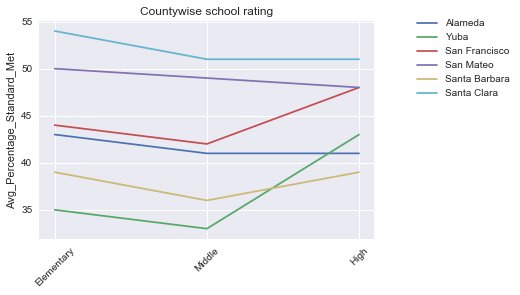

In [73]:
for county in selected_county:
    alameda = school_county.loc[school_county.County == county]
    plt.plot([1,2,3],list(alameda["Avg_Percentage_Standard_Met"].values),markersize=12,label = county)
    plt.title("Countywise school rating")
    plt.ylabel("Avg_Percentage_Standard_Met")
    labels = ['Elementary', 'Middle', 'High']
    plt.xticks([1,2,3], labels, rotation='45')
    plt.legend(bbox_to_anchor=(1.1, 1.05))

    

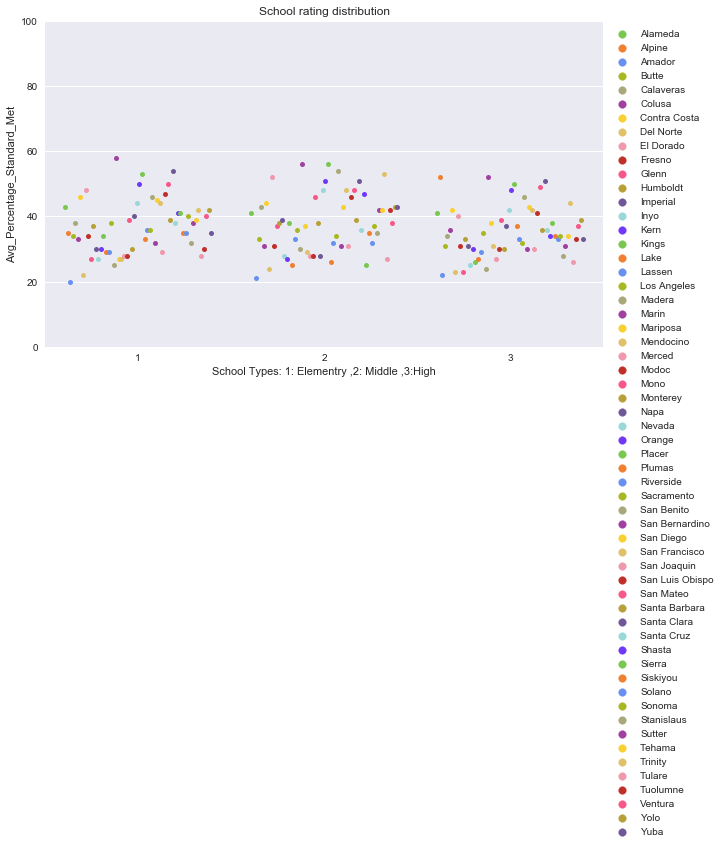

In [74]:
pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]

plt.figure(figsize=(10,6)) 
sns.swarmplot(x='type_id', 
              y='Avg_Percentage_Standard_Met', 
              data=school_county, 
              hue='County', 
              split=True, # 2. Separate points by hue
              palette=pkmn_type_colors) # 3. Use Pokemon palette
 
# 4. Adjust the y-axis
plt.ylim(0, 100)
labels = ['Elementary', 'Middle', 'High'] 
#plt.xticks([1,2,3], labels, rotation='45')
plt.title("School rating distribution")
plt.ylabel("Avg_Percentage_Standard_Met")
plt.xlabel("School Types: 1: Elementry ,2: Middle ,3:High")

# 5. Place legend to the right
plt.legend(bbox_to_anchor=(1, 1), loc=2)

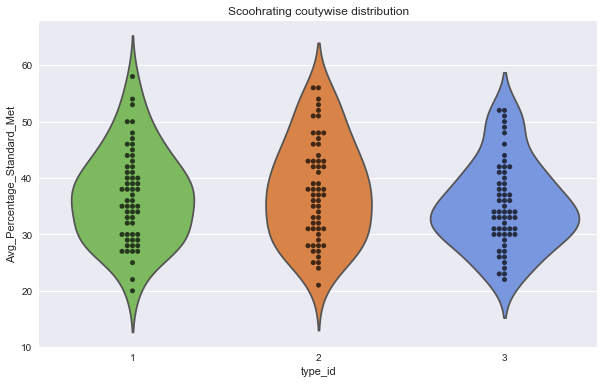

In [75]:
# Set figure size with matplotlib
plt.figure(figsize=(10,6))
 
# Create plot
sns.violinplot(x='type_id', y='Avg_Percentage_Standard_Met',data=school_county, 
               inner=None, # Remove the bars inside the violins
               palette=pkmn_type_colors)
 
sns.swarmplot(x='type_id', y='Avg_Percentage_Standard_Met',data=school_county, 
              color='k', # Make points black
              alpha=0.7) # and slightly transparent
 
# Set title with matplotlib
plt.title('Scoohrating coutywise distribution')